<a href="https://colab.research.google.com/github/Ahmed-Gomaa1/Bank-Loan-Preprocessing-Modeling-with-5-ML/blob/main/Bank_Loan%7CPreprocessing_Modeling_with_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.utils import resample


In [ ]:
trainD= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_train.csv')

In [ ]:
trainD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
trainD.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
Df=trainD.dropna(thresh=14)

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [ ]:
Df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
Df.drop('Loan ID',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Df.drop('Customer ID',axis=1,inplace=True)

In [ ]:
Df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## EDA For Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


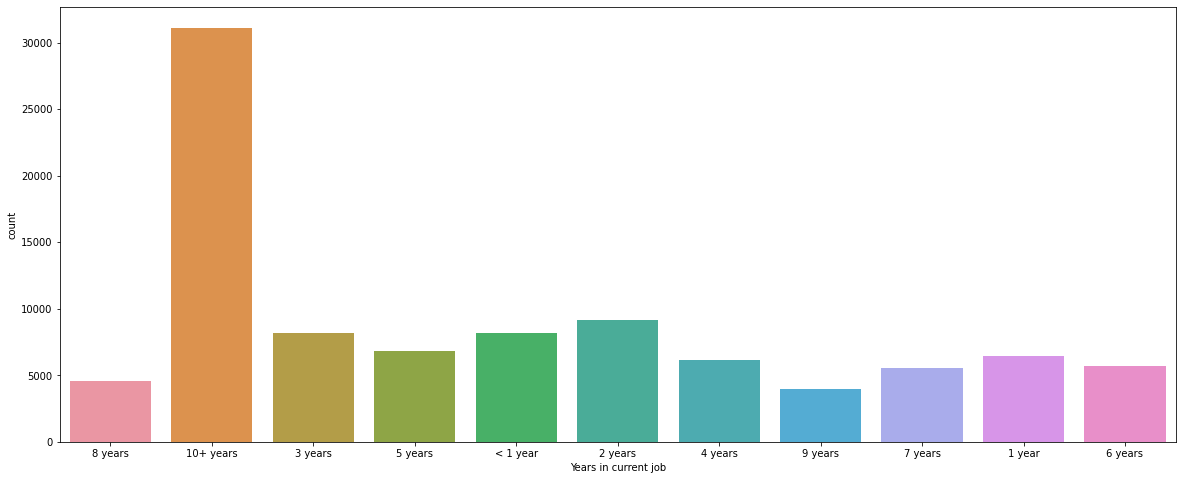

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(Df['Years in current job'])

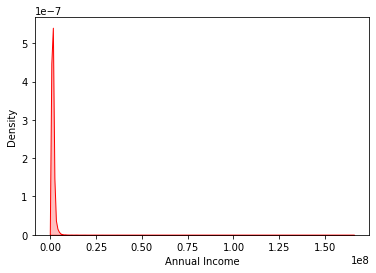

In [ ]:
sns.kdeplot(Df['Annual Income'],
                color="Red", shade = True)

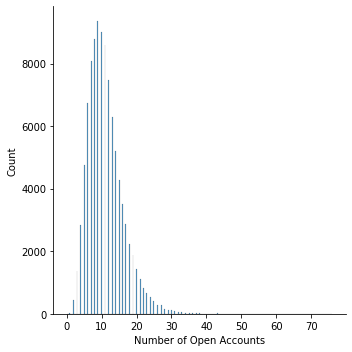

In [ ]:
sns.displot(Df['Number of Open Accounts'])

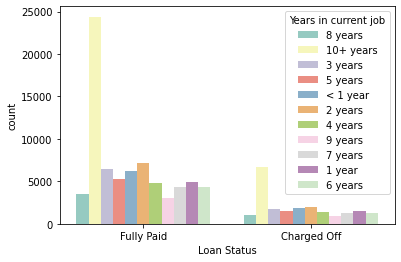

In [ ]:
ax = sns.countplot(x="Loan Status", data=Df,hue="Years in current job",palette="Set3")

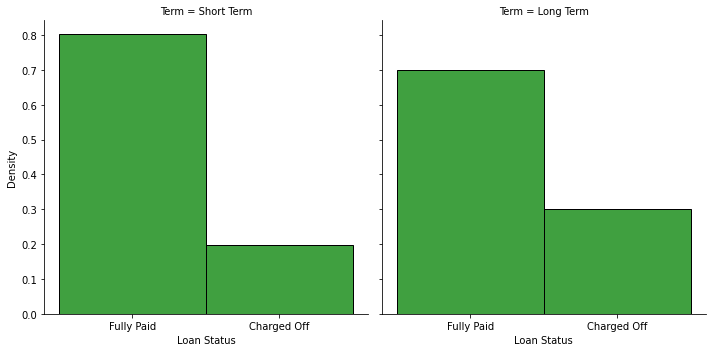

In [ ]:
sns.displot(Df,x="Loan Status", col="Term", stat="density",common_norm=False,color="green")


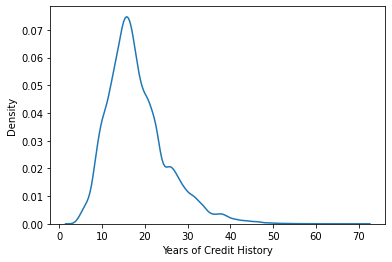

In [ ]:
sns.kdeplot(data=Df, x="Years of Credit History")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


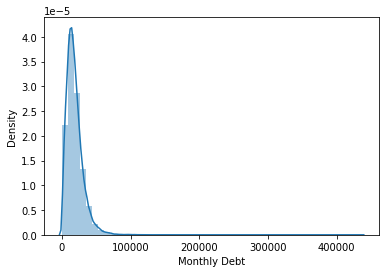

In [ ]:
sns.distplot(Df["Monthly Debt"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


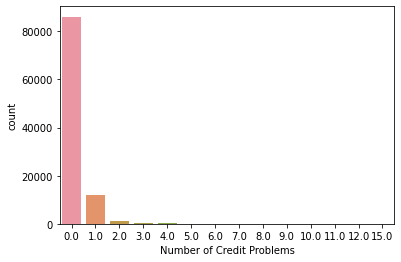

In [ ]:
sns.countplot(Df['Number of Credit Problems'])

## Filling Missing Data

In [ ]:
Df.drop(Df.tail(514).index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Df.drop(columns = 'Months since last delinquent', axis=1,inplace=True)

In [ ]:
Df['Credit Score'].describe()

count    80430.000000
mean      1077.291682
std       1477.035626
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [ ]:
lo=Df['Credit Score'].dropna()
Df['Credit Score']=Df['Credit Score'].fillna(pd.Series(np.random.choice(lo,size=len(Df.index))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Df['Credit Score'].fillna(Df['Credit Score'].mean(),inplace=True)

In [ ]:
Df['Annual Income'].describe()

count    8.043000e+04
mean     1.378107e+06
std      1.082257e+06
min      7.662700e+04
25%      8.487680e+05
50%      1.173896e+06
75%      1.650530e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [ ]:
li=Df['Annual Income'].dropna()
Df['Annual Income']=Df['Annual Income'].fillna(pd.Series(np.random.choice(li,size=len(Df.index))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Df['Annual Income'].fillna(Df['Annual Income'].std(),inplace=True)

In [ ]:
Df['Bankruptcies'].describe()


count    99283.000000
mean         0.117694
std          0.351231
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [ ]:
Df['Bankruptcies'].fillna(Df['Bankruptcies'].std(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
Df['Tax Liens'].describe()

count    99476.000000
mean         0.029344
std          0.258232
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [ ]:
Df['Tax Liens'].fillna(Df['Tax Liens'].std(),inplace=True)

In [ ]:
Df['Years in current job'].describe()

count         95291
unique           11
top       10+ years
freq          30960
Name: Years in current job, dtype: object

In [ ]:
lis=Df['Years in current job'].dropna()
Df['Years in current job']=Df['Years in current job'].fillna(pd.Series(np.random.choice(lis,size=len(Df.index))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Df['Years in current job'].fillna('10+ years',inplace=True)

In [ ]:
Df['Maximum Open Credit'].describe()

count    9.948400e+04
mean     7.589376e+05
std      8.383165e+06
min      0.000000e+00
25%      2.733940e+05
50%      4.678410e+05
75%      7.831615e+05
max      1.539738e+09
Name: Maximum Open Credit, dtype: float64

In [ ]:
Df['Maximum Open Credit'].fillna(Df['Maximum Open Credit'].mean(),inplace=True)

In [ ]:
Df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99486 entries, 0 to 99485
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                99486 non-null  object 
 1   Current Loan Amount        99486 non-null  float64
 2   Term                       99486 non-null  object 
 3   Credit Score               99486 non-null  float64
 4   Annual Income              99486 non-null  float64
 5   Years in current job       99486 non-null  object 
 6   Home Ownership             99486 non-null  object 
 7   Purpose                    99486 non-null  object 
 8   Monthly Debt               99486 non-null  float64
 9   Years of Credit History    99486 non-null  float64
 10  Number of Open Accounts    99486 non-null  float64
 11  Number of Credit Problems  99486 non-null  float64
 12  Current Credit Balance     99486 non-null  float64
 13  Maximum Open Credit        99486 non-null  flo

In [ ]:
Df.duplicated().sum()

9745

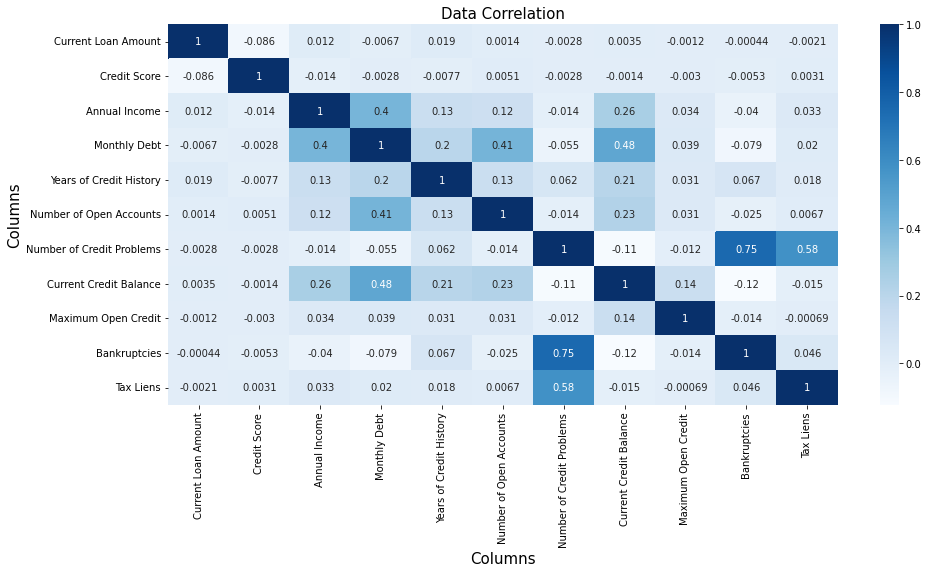

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(Df.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

## Encoding With LabelEncoder

In [ ]:
le = LabelEncoder()
Df['Term']=le.fit_transform(Df['Term'])
Df['Years in current job']=le.fit_transform(Df['Years in current job'])
Df['Home Ownership']=le.fit_transform(Df['Home Ownership'])
Df['Purpose']=le.fit_transform(Df['Purpose'])
Df['Loan Status']=le.fit_transform(Df['Loan Status'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
Df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,701.0,1044772.0,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,745.0,766574.0,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99481,0,464354.0,0,744.0,1742756.0,8,1,3,14984.73,18.5,15.0,0.0,193971.0,331760.0,0.0,0.0
99482,1,170610.0,1,733.0,1236900.0,10,3,3,14230.24,8.5,9.0,0.0,127262.0,192874.0,0.0,0.0
99483,0,369446.0,1,742.0,1313774.0,2,3,3,28136.72,14.1,19.0,0.0,337288.0,1365518.0,0.0,0.0
99484,1,342474.0,1,731.0,1230440.0,1,1,3,5362.56,18.2,6.0,1.0,131480.0,634370.0,1.0,0.0


### Resampling Data with Synthetic Minority Oversampling Technique or SMOTE

In [ ]:
Df['Loan Status'].value_counts()

1    76956
0    22530
Name: Loan Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


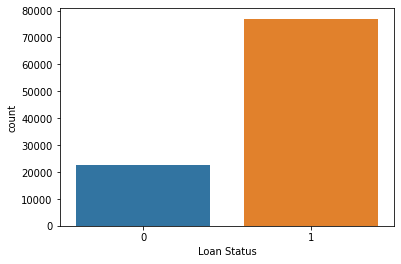

In [ ]:
sns.countplot(Df['Loan Status'])

In [ ]:
#df_majority = Df[(Df['Loan Status']==1)] 
#df_minority = Df[(Df['Loan Status']==0)] 
#df_minority_upsampled = resample(df_minority, 
                               #replace=True,    
                             # n_samples= 70000, 
                           # random_state=42)  
#df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
#sns.countplot(df_upsampled['Loan Status'])

In [ ]:
X = Df.drop(labels='Loan Status', axis=1).values
y = Df['Loan Status'].values

[Text(0, 0, 'Loan Status'),
 Text(0, 0, 'Current Loan Amount'),
 Text(0, 0, 'Term'),
 Text(0, 0, 'Credit Score'),
 Text(0, 0, 'Annual Income'),
 Text(0, 0, 'Years in current job'),
 Text(0, 0, 'Home Ownership'),
 Text(0, 0, 'Purpose'),
 Text(0, 0, 'Monthly Debt'),
 Text(0, 0, 'Years of Credit History'),
 Text(0, 0, 'Number of Open Accounts'),
 Text(0, 0, 'Number of Credit Problems'),
 Text(0, 0, 'Current Credit Balance'),
 Text(0, 0, 'Maximum Open Credit'),
 Text(0, 0, 'Bankruptcies'),
 Text(0, 0, 'Tax Liens')]

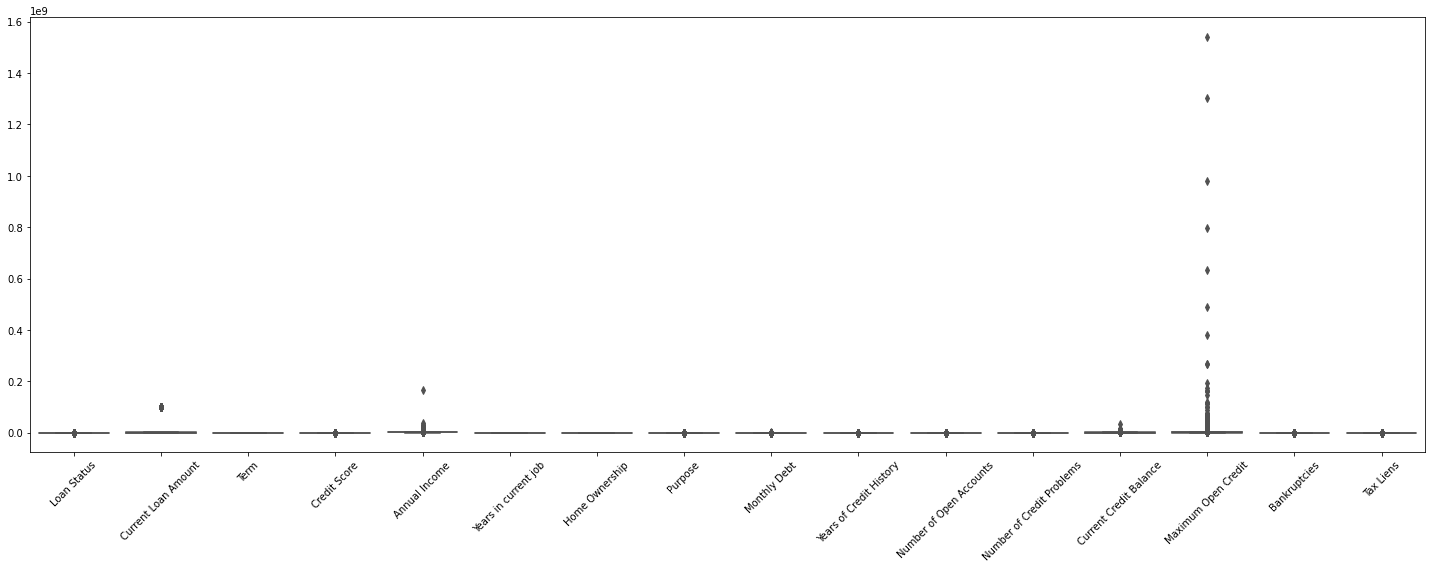

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=Df)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

### Reduce Effect of Outliers With RobustScaler

In [ ]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## DecisionTree Model

In [ ]:
dt =DecisionTreeClassifier(max_features=15 , max_depth=15)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=15, max_features=15)

In [ ]:
dt.score(x_train , y_train)
#with Resampling 0.7671

0.8559581846509524

In [ ]:
dt.score(x_test , y_test)
#with Resampling 0.7037

0.7986732334908031

## RandomForest Model

In [ ]:
rf = RandomForestClassifier(max_features=15,max_depth=15)

In [ ]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=15, max_features=15)

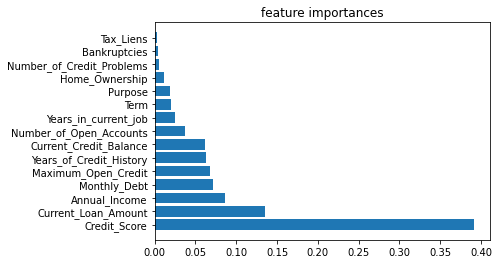

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = ['Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']
      

f_importances(abs(rf.feature_importances_), features_names, top=15)

In [ ]:
rf.score(x_train , y_train)
#with Resampling 0.8813

0.8493994069457708

In [ ]:
rf.score(x_test , y_test)
#with Resampling 0.7919

0.81998190772942

## KNeighborsClassifier Model

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(x_train , y_train)
#with Resampling 0.8426

0.8397497110117103

In [ ]:
knn.score(x_test , y_test)
#with Resampling 0.7460

0.7943511910744798

## LogisticRegression Model

In [ ]:
Lg = LogisticRegression()
Lg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Lg.score(x_train , y_train)
#with Resampling 0.6495

0.8132004824847967

In [ ]:
Lg.score(x_test , y_test)
#with Resampling 0.6533

0.8184742185144236

## XGBClassifier 

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train, y_train)

XGBClassifier()

In [ ]:
xgb.score(x_train , y_train)
#with Resampling 0.6734


0.8132507413177866

In [ ]:
xgb.score(x_test , y_test)
#with Resampling 0.6704

0.8186249874359232

## Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations

### Approach to deal with the imbalanced dataset problem

## 1 Resampling (Oversampling and Undersampling)
This technique is used to upsample or downsample the minority or majority class. When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique is called oversampling. Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.

## 2 SMOTE
Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

## 3 BalancedBaggingClassifier
When we try to use a usual classifier to classify an imbalanced dataset, the model favors the majority class due to its larger volume presence. A BalancedBaggingClassifier is the same as a sklearn classifier but with additional balancing. It includes an additional step to balance the training set at the time of fit for a given sampler. This classifier takes two special parameters “sampling_strategy” and “replacement”.

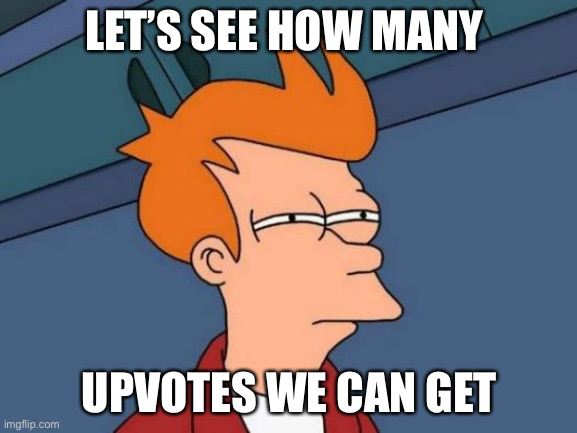